In [146]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import torch


filename = 'ckpt/model_res_180912rot_validation.dat'

In [147]:
saved = torch.load(filename)

train_loss = saved['train_loss']
train_accuracy = saved['train_accuracy']
test_loss = saved['test_loss']
test_accuracy = saved['test_accuracy']
test_confusion = saved['test_confusion']
if 'classes' in saved.keys():
    classes = saved['classes']
else:
    classes =  {'mildNPDR': 0, 'modNPDR': 1, 'normal': 2, 'severe_NPDR': 3}

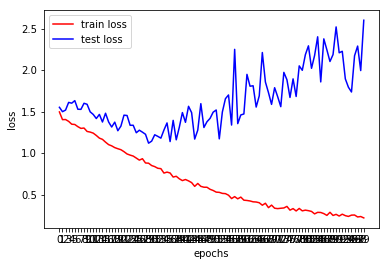

In [148]:
plt.plot(train_loss.numpy(), 'r', label='train loss')
plt.plot(test_loss.numpy(), 'b', label='test loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.xticks(np.arange(train_loss.size(0)))
plt.show()
#plt.savefig('loss.png')

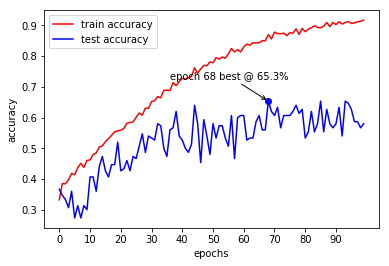

In [149]:
plt.plot(train_accuracy.numpy(), 'r', label='train accuracy')
plt.plot(test_accuracy.numpy(), 'b', label='test accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.xticks(np.arange(0,train_accuracy.size(0), 10))
plt.plot(np.argmax(test_accuracy.numpy()), np.max(test_accuracy.numpy()), 'bo')
plt.annotate(
        'epoch {} best @ {:.1f}%'.format(np.argmax(test_accuracy.numpy()), np.max(test_accuracy.numpy())*100),
        xy=(np.argmax(test_accuracy.numpy()), np.max(test_accuracy.numpy())), xytext=(20, 20),
        textcoords='offset points', ha='right', va='bottom',
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.show()
#plt.savefig('accuracy.png')

In [150]:
#ax = plt.subplots(1, min(5,test_confusion.size(0)), True, True)
#ax[1][0].set_ylabel('predicted label')
#ax[1][0].set_yticklabels(classes.keys())
#for ii in range(min(5,test_confusion.size(0))):
#    ax[1][ii].imshow(test_confusion[-1-ii,:,:].numpy()[::-1,:], origin='lower')
#    ax[1][ii].set_xlabel('true label')
#    ax[1][ii].set_xticks(np.arange(test_confusion.size(2)))
#    ax[1][ii].set_xticklabels(reversed(sorted(classes.keys())), rotation=90)
#    ax[1][ii].set_yticks(np.arange(test_confusion.size(2)))
#plt.show()
#ax[0].savefig('confusion.png')
print(classes)
print('Best accuracy after epoch {} @ {:.1f}%'.format(np.argmax(test_accuracy.numpy()), np.max(test_accuracy.numpy())*100))
print(test_confusion[int(np.argmax(test_accuracy.numpy())),:,:])

print('in percent:\n', test_confusion[int(np.argmax(test_accuracy.numpy())),:,:].numpy()/test_confusion.numpy()[0,:,0].sum()*100)


{'PDR': 0, 'mildNPDR': 1, 'modNPDR': 2, 'noDMR': 3, 'severe_NPDR': 4}
Best accuracy after epoch 68 @ 65.3%
tensor([[29.,  1.,  2.,  0.,  3.],
        [ 0.,  7.,  2.,  3.,  0.],
        [ 0.,  3., 15.,  2.,  1.],
        [ 0., 18.,  8., 23.,  2.],
        [ 1.,  1.,  3.,  2., 24.]])
in percent:
 [[96.666664   3.3333335  6.666667   0.        10.       ]
 [ 0.        23.333334   6.666667  10.         0.       ]
 [ 0.        10.        50.         6.666667   3.3333335]
 [ 0.        60.000004  26.666668  76.666664   6.666667 ]
 [ 3.3333335  3.3333335 10.         6.666667  80.       ]]


In [143]:
[test_confusion[68,:,1]+test_confusion[68,:,3], test_confusion[68,:,0]+test_confusion[68,:,2]+test_confusion[68,:,4]]

[tensor([ 1., 10.,  5., 41.,  3.]), tensor([34.,  2., 16., 10., 28.])]

In [144]:
51 12
9  78

SyntaxError: invalid syntax (<ipython-input-144-828a38a073ac>, line 1)

In [145]:
129/150

0.86